In [13]:
import numpy as np                # creating arrays for linear algebra
import pandas as pd               # used to create dataframes for data processing using the csv file
import seaborn as sns             # used for visualization
import matplotlib.pyplot as plt

In [22]:
dataset = pd.read_excel("M:/practice/TB_Chest_Radiography_Database/Normal.metadata.xlsx")

# Function to check if the data is numeric
def is_numeric_data(data):
    # Check the data types of all columns
    data_types = data.dtypes
    # If any column has a non-numeric data type, return False
    if any(dtype not in ['int64', 'float64'] for dtype in data_types):
        return False
    else:
        return True

# Read data from Excel file
def read_data(dataset):
    try:
        # Read data from file
        data = dataset
        
        # Check if the data is numeric
        if is_numeric_data(data):
            # Process the data further
            print("Data is numeric and can be processed.")
            # Further processing code goes here
        else:
            print("Invalid data type provided. Numeric data is expected.")
    except Exception as e:
        print("Error reading the file:", e)

# Example usage
dataset = pd.read_csv("M:\practice\IMDB Dataset-1.csv")
read_data(dataset)


Invalid data type provided. Numeric data is expected.


In [5]:
dataset.columns


Index(['review', 'sentiment'], dtype='object')

In [144]:
dataset.head(10)


,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
5,P102,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P103,52,2,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
7,P104,28,2,3,1,4,3,2,3,4,...,3,2,2,4,2,2,3,4,3,Low
8,P105,35,2,4,5,6,5,6,5,5,...,1,4,3,2,4,6,2,4,1,Medium
9,P106,46,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,1,5,Medium


In [145]:
print("Number of columns: "+str(len(dataset.columns)))
print("\nThe list of available column names:")
for index in range(len(dataset.columns)):
    print(" - " + dataset.columns[index])

Number of columns: 25

The list of available column names:
 - Patient Id
 - Age
 - Gender
 - AirPollution
 - Alcoholuse
 - DustAllergy
 - OccuPationalHazards
 - GeneticRisk
 - chronicLungDisease
 - BalancedDiet
 - Obesity
 - Smoking
 - PassiveSmoker
 - ChestPain
 - CoughingofBlood
 - Fatigue
 - WeightLoss
 - ShortnessofBreath
 - Wheezing
 - SwallowingDifficulty
 - ClubbingofFingerNails
 - FrequentCold
 - DryCough
 - Snoring
 - Level


In [146]:
dataset.shape 

(1000, 25)

In [147]:
dataset.isnull().sum() 

Patient Id               0
Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

In [148]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
X = dataset.drop(['Level','Patient Id'], axis=1)
y = dataset['Level']

In [149]:
for index in range(len(X.columns)):
    print(" - " + X.columns[index])
len(X.columns)

 - Age
 - Gender
 - AirPollution
 - Alcoholuse
 - DustAllergy
 - OccuPationalHazards
 - GeneticRisk
 - chronicLungDisease
 - BalancedDiet
 - Obesity
 - Smoking
 - PassiveSmoker
 - ChestPain
 - CoughingofBlood
 - Fatigue
 - WeightLoss
 - ShortnessofBreath
 - Wheezing
 - SwallowingDifficulty
 - ClubbingofFingerNails
 - FrequentCold
 - DryCough
 - Snoring


23

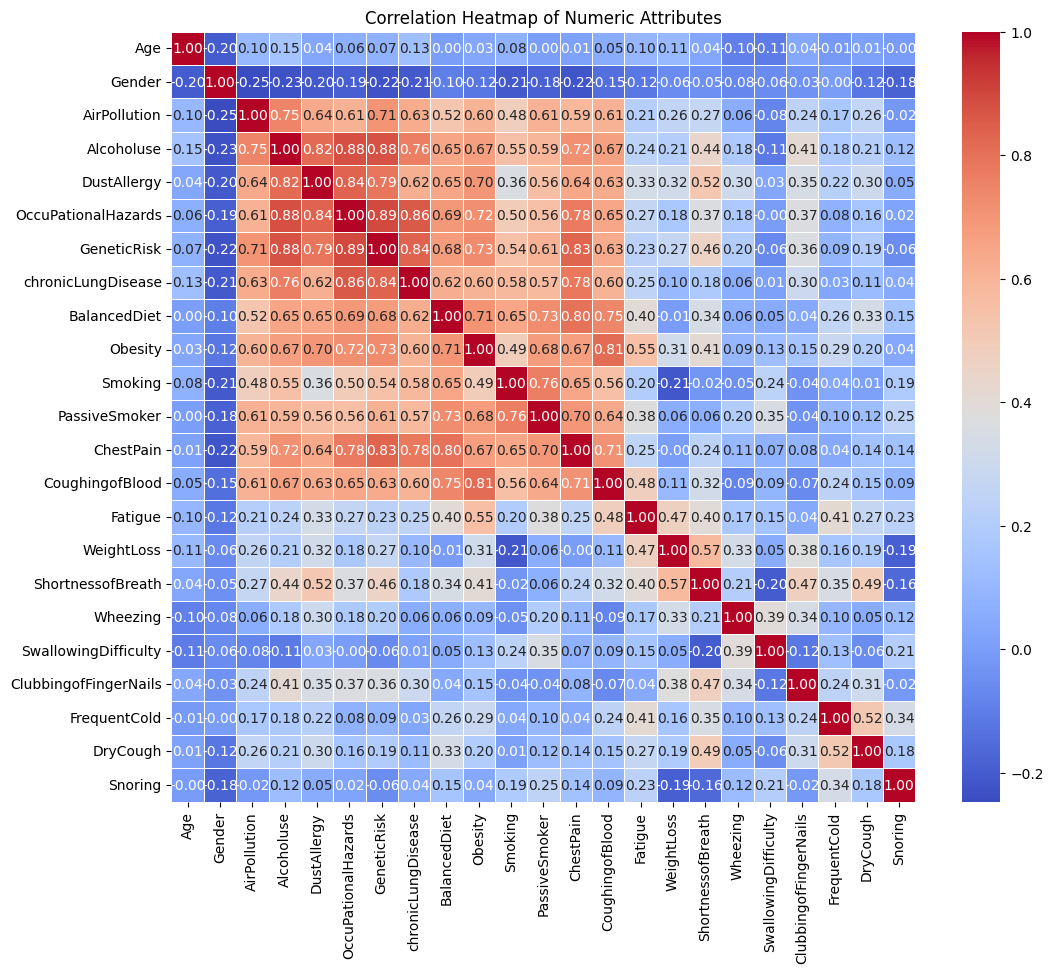

In [150]:
# Assuming 'dataset' is your DataFrame
# Get a list of non-numeric column names
non_numeric_columns = dataset.select_dtypes(exclude=['number']).columns.tolist()

# Drop non-numeric columns from the DataFrame
numeric_dataset = dataset.drop(non_numeric_columns, axis=1)

# Compute the correlation matrix
corr_matrix = numeric_dataset.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()


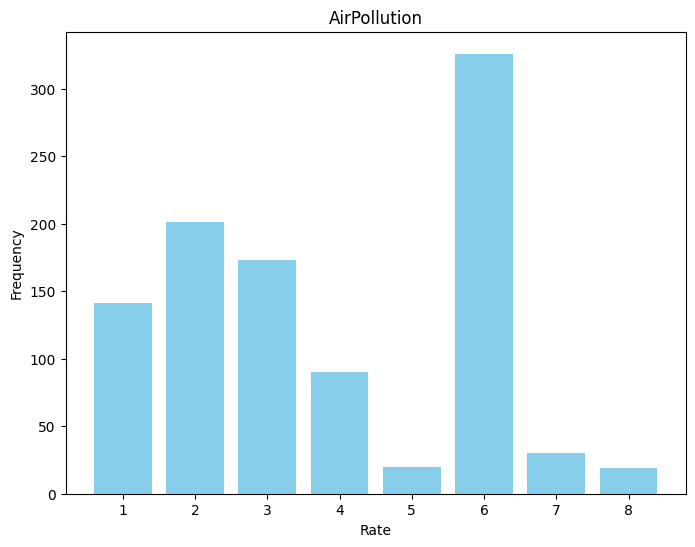

In [151]:
attribute = 'AirPollution'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


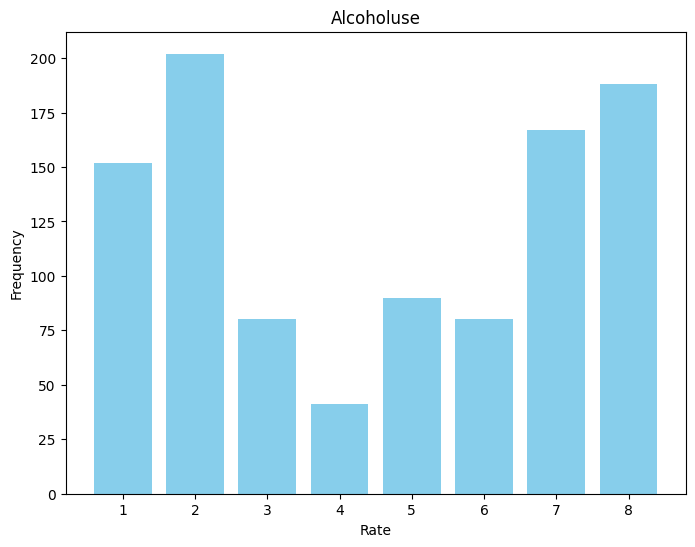

In [152]:
attribute = 'Alcoholuse'
rate_counts =dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


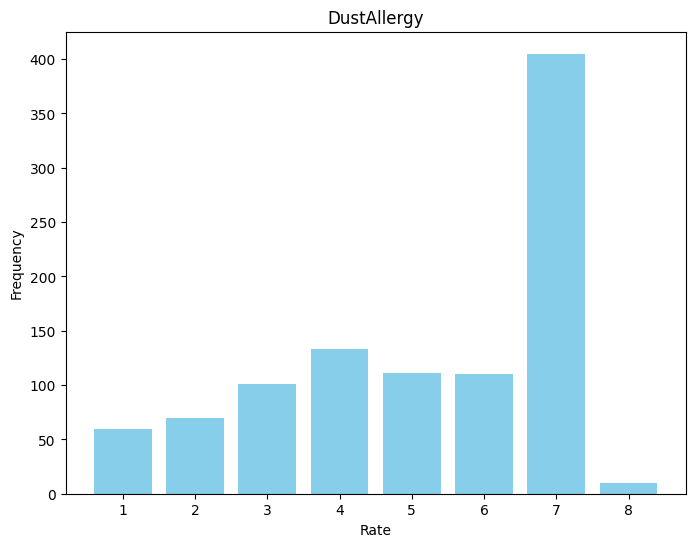

In [153]:
attribute = 'DustAllergy'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


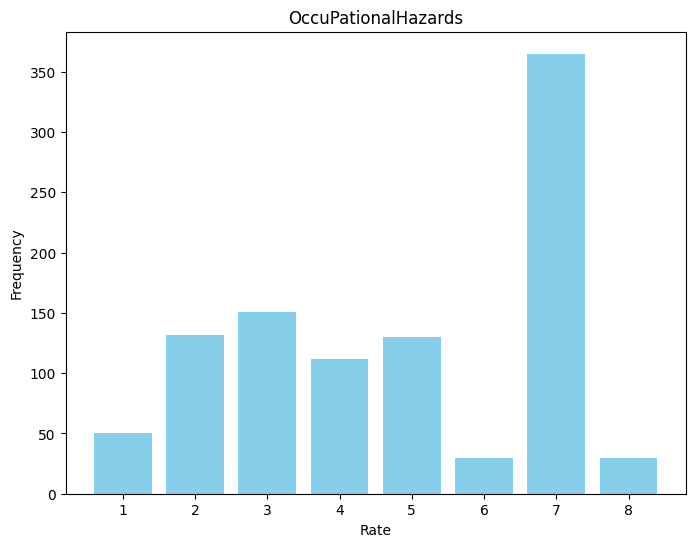

In [154]:
attribute = 'OccuPationalHazards'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


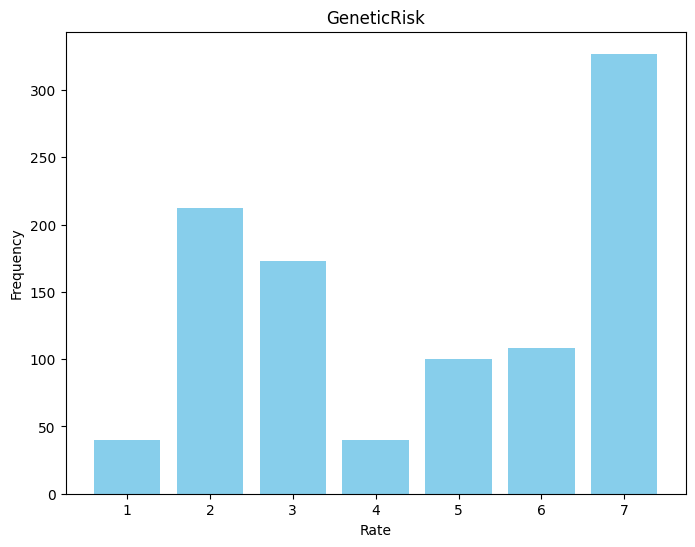

In [155]:
attribute = 'GeneticRisk'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


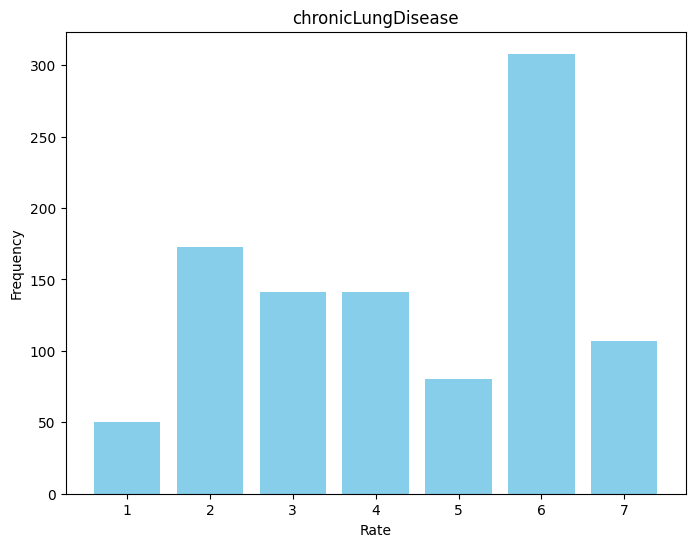

In [156]:
attribute = 'chronicLungDisease'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


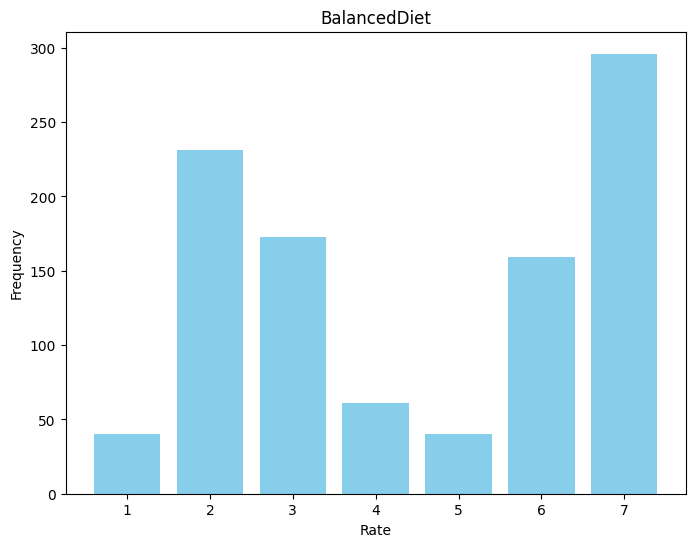

In [157]:
attribute = 'BalancedDiet'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


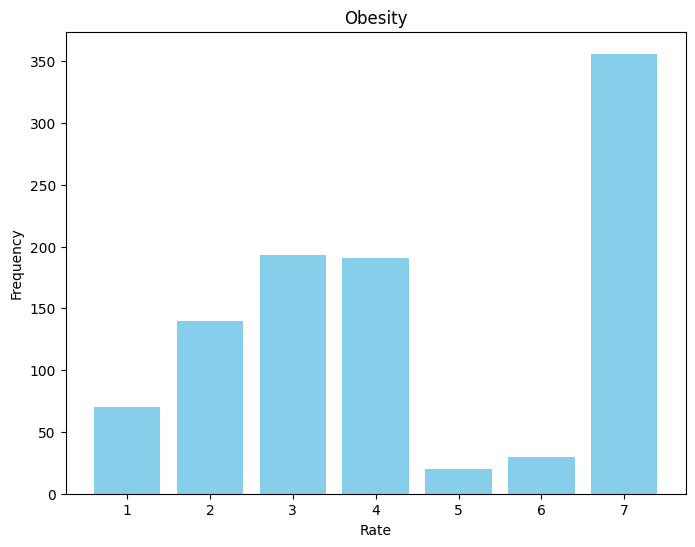

In [158]:
attribute = 'Obesity'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


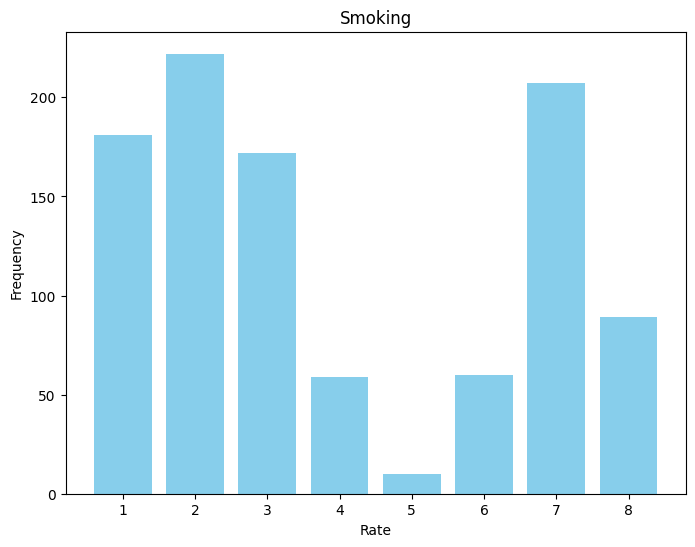

In [159]:
attribute = 'Smoking'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


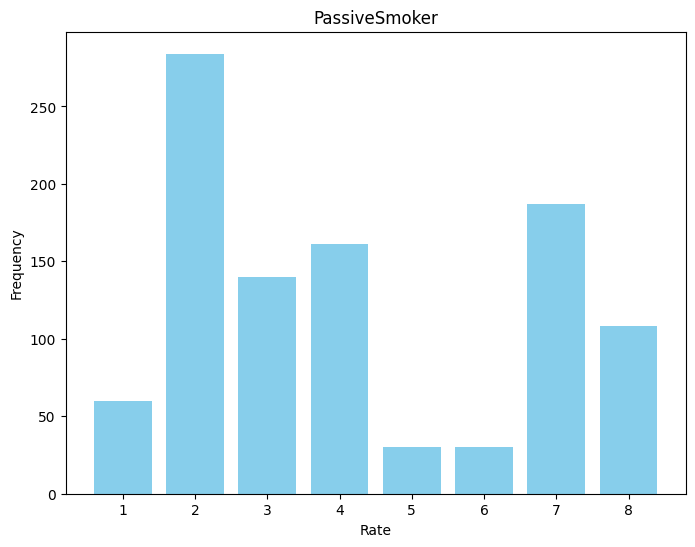

In [160]:
attribute = 'PassiveSmoker'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


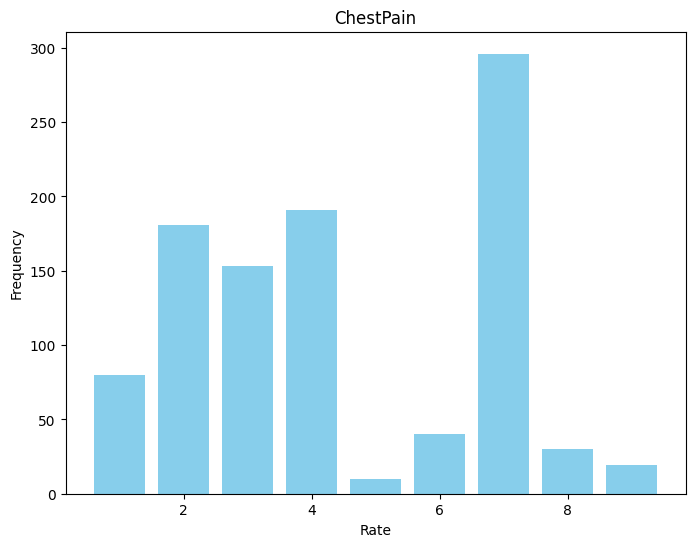

In [161]:
attribute = 'ChestPain'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


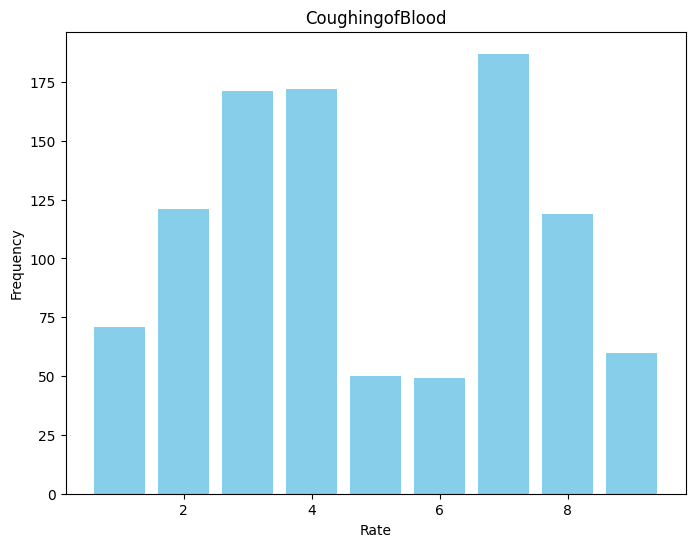

In [162]:
attribute = 'CoughingofBlood'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


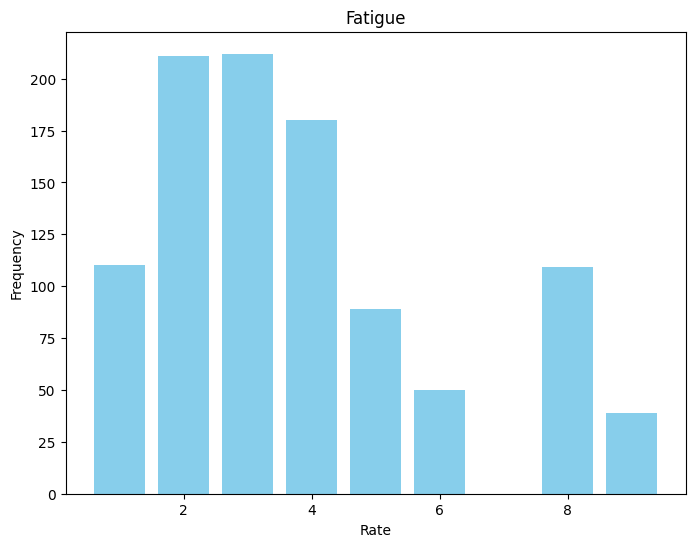

In [163]:
attribute = 'Fatigue'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


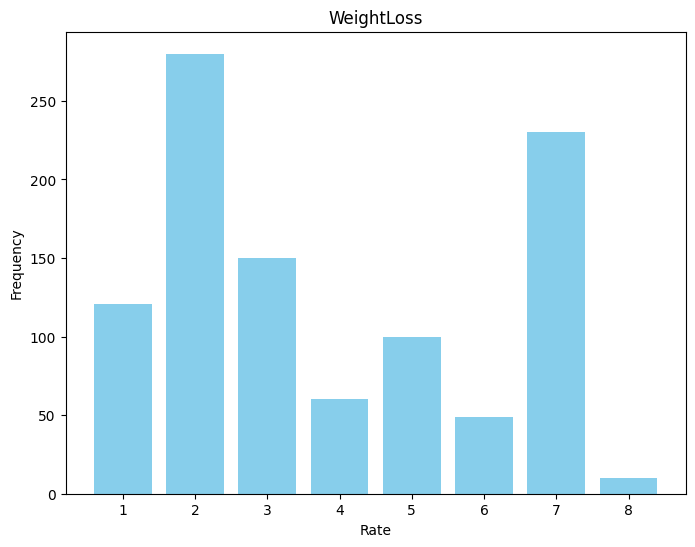

In [164]:
attribute = 'WeightLoss'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


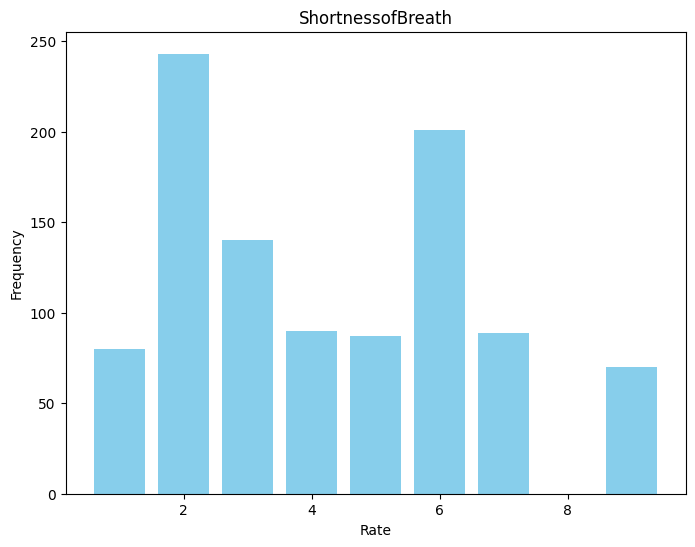

In [165]:
attribute = 'ShortnessofBreath'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


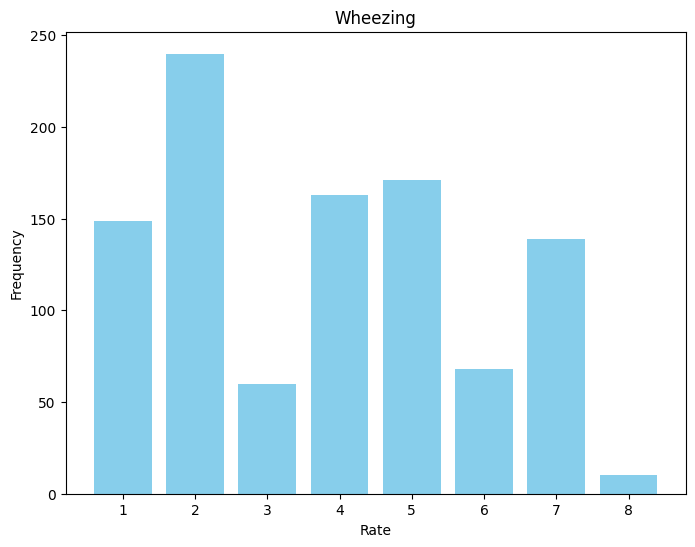

In [166]:
attribute = 'Wheezing'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


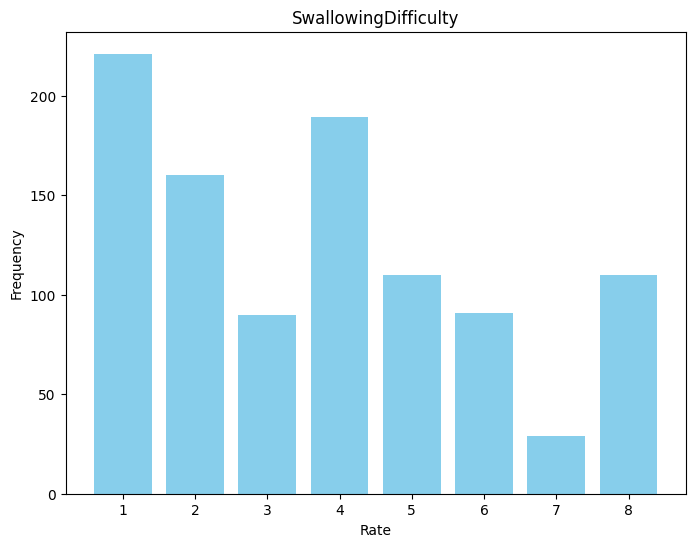

In [167]:
attribute = 'SwallowingDifficulty'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


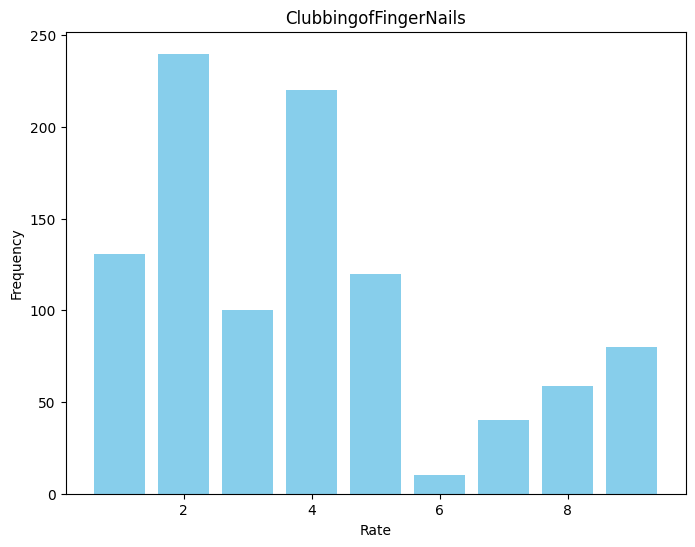

In [168]:
attribute = 'ClubbingofFingerNails'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


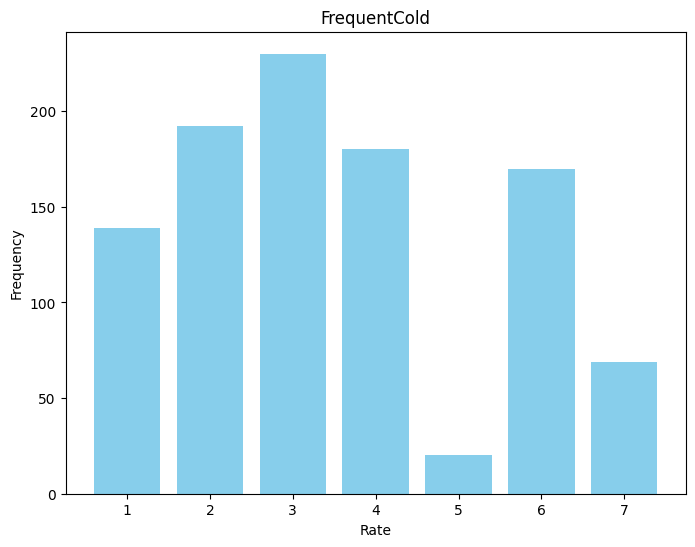

In [169]:
attribute = 'FrequentCold'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


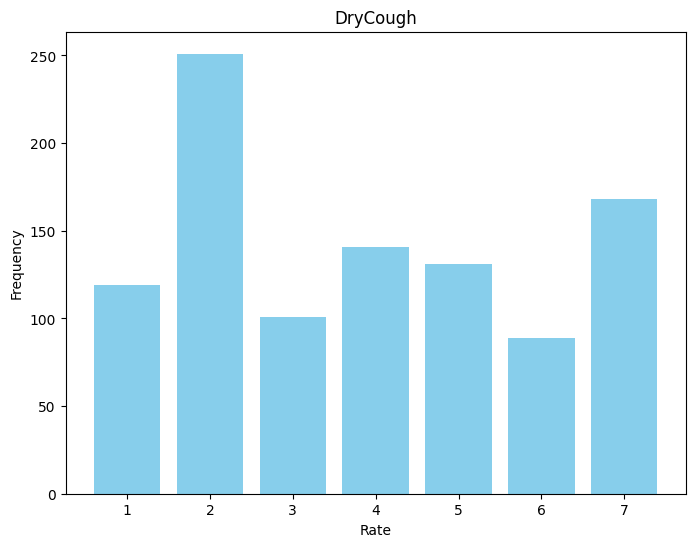

In [170]:
attribute = 'DryCough'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


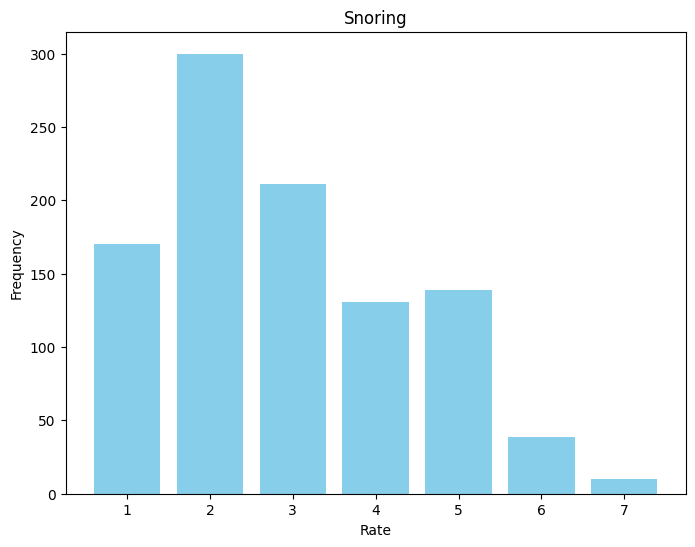

In [171]:
attribute = 'Snoring'
rate_counts = dataset[attribute].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.bar(rate_counts.index, rate_counts.values, color='skyblue')
plt.title(attribute)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()


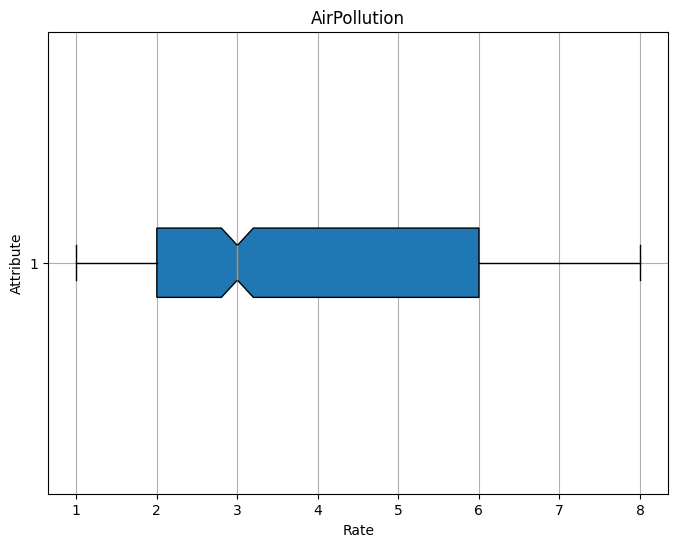

In [172]:
# AirPollution
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['AirPollution'], patch_artist=True, notch=True, vert=False)
plt.title('AirPollution')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

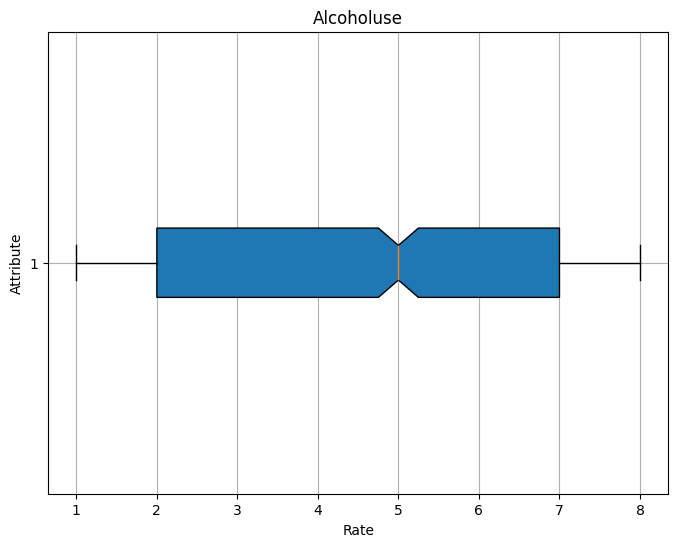

In [173]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Alcoholuse'], patch_artist=True, notch=True, vert=False)
plt.title('Alcoholuse')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

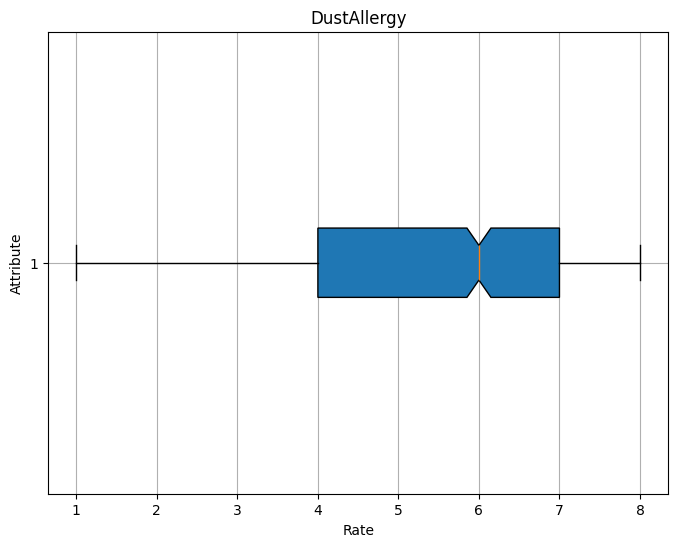

In [174]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['DustAllergy'], patch_artist=True, notch=True, vert=False)
plt.title('DustAllergy')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

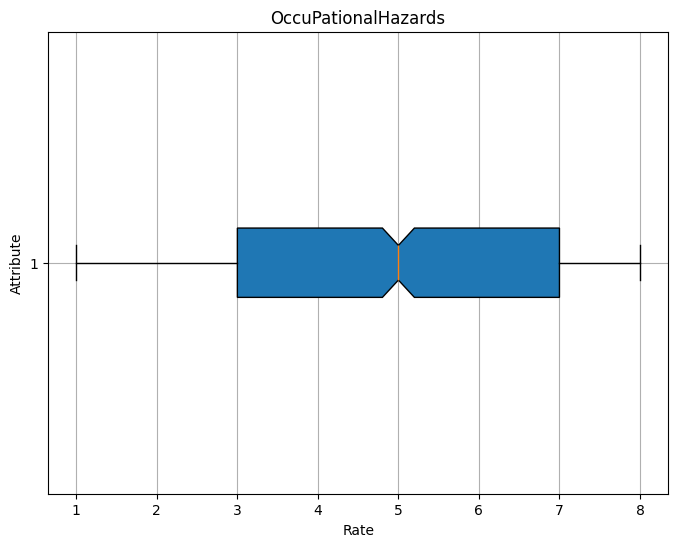

In [175]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['OccuPationalHazards'], patch_artist=True, notch=True, vert=False)
plt.title('OccuPationalHazards')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

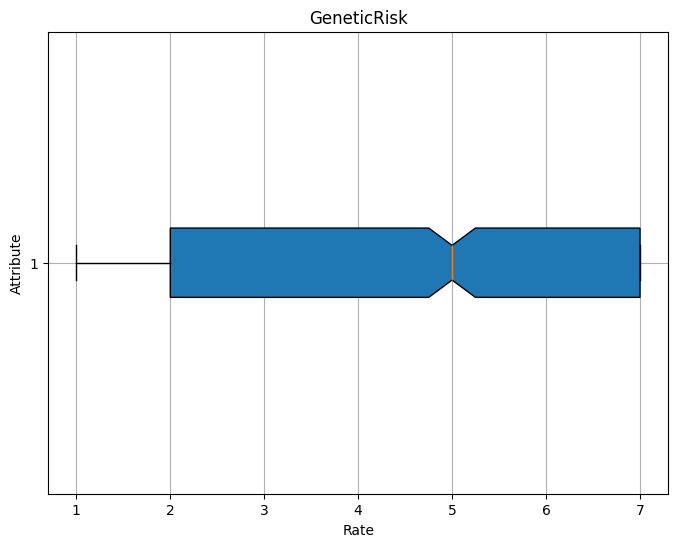

In [176]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['GeneticRisk'], patch_artist=True, notch=True, vert=False)
plt.title('GeneticRisk')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

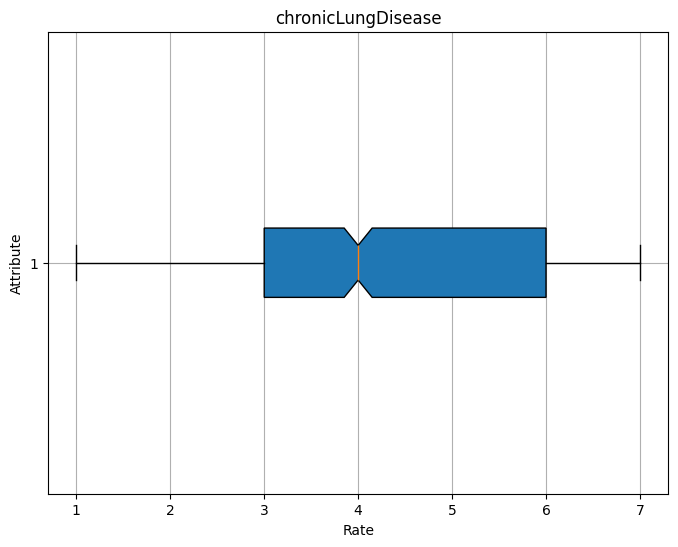

In [177]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['chronicLungDisease'], patch_artist=True, notch=True, vert=False)
plt.title('chronicLungDisease')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

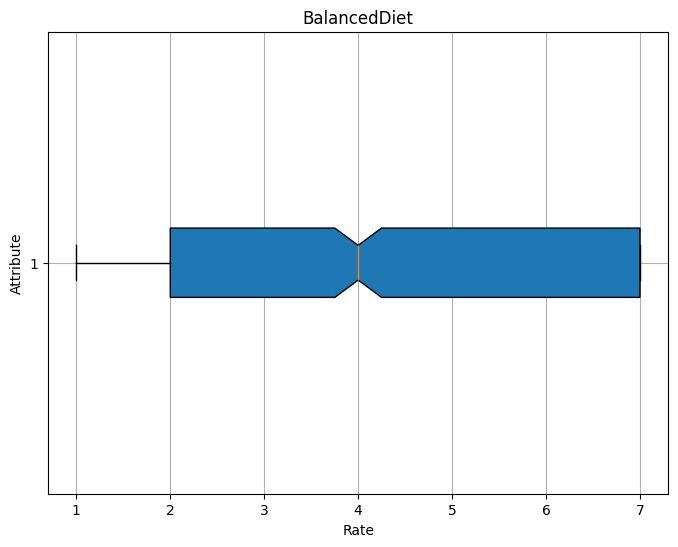

In [178]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['BalancedDiet'], patch_artist=True, notch=True, vert=False)
plt.title('BalancedDiet')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()


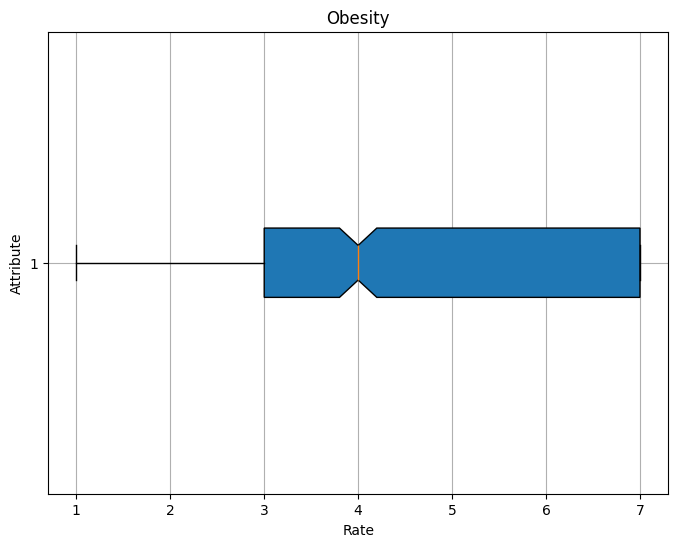

In [179]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Obesity'], patch_artist=True, notch=True, vert=False)
plt.title('Obesity')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

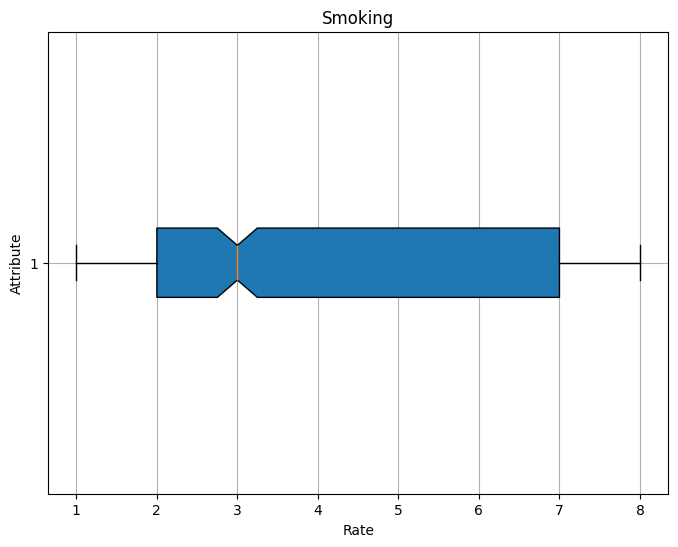

In [180]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Smoking'], patch_artist=True, notch=True, vert=False)
plt.title('Smoking')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

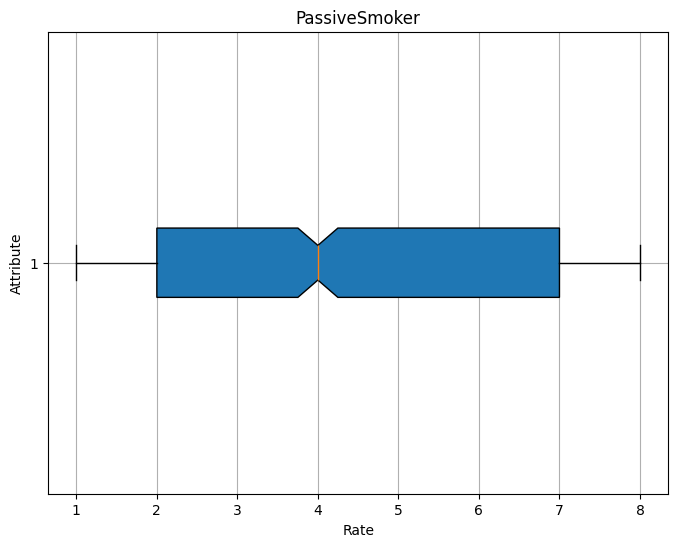

In [181]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['PassiveSmoker'], patch_artist=True, notch=True, vert=False)
plt.title('PassiveSmoker')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

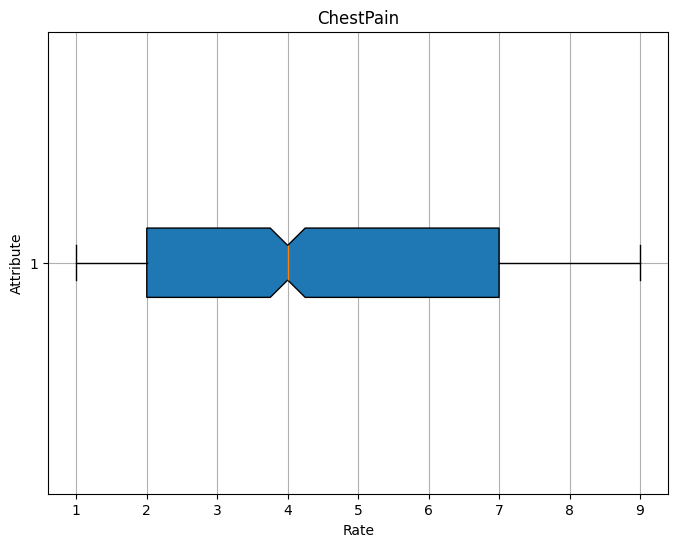

In [182]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['ChestPain'], patch_artist=True, notch=True, vert=False)
plt.title('ChestPain')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

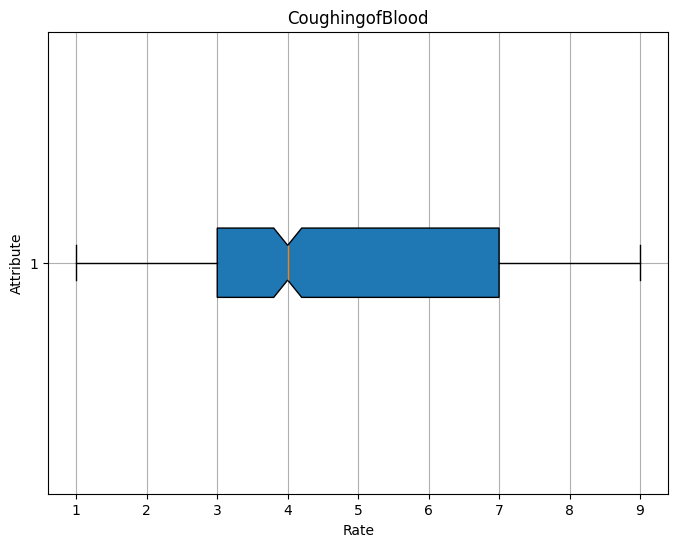

In [183]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['CoughingofBlood'], patch_artist=True, notch=True, vert=False)
plt.title('CoughingofBlood')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

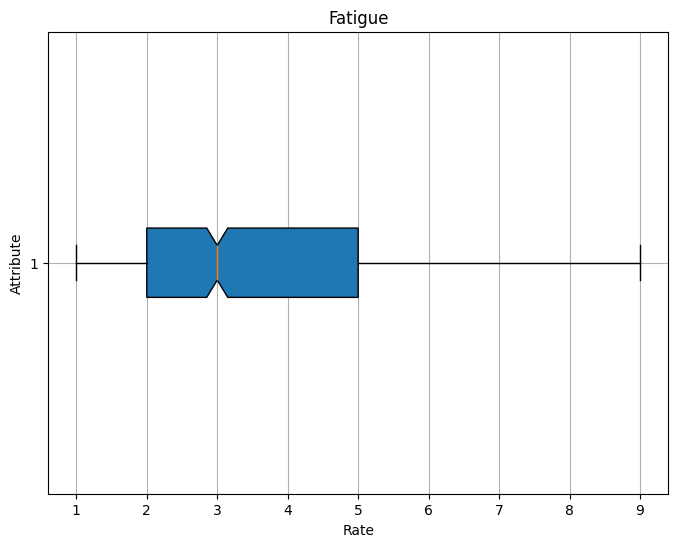

In [184]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Fatigue'], patch_artist=True, notch=True, vert=False)
plt.title('Fatigue')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

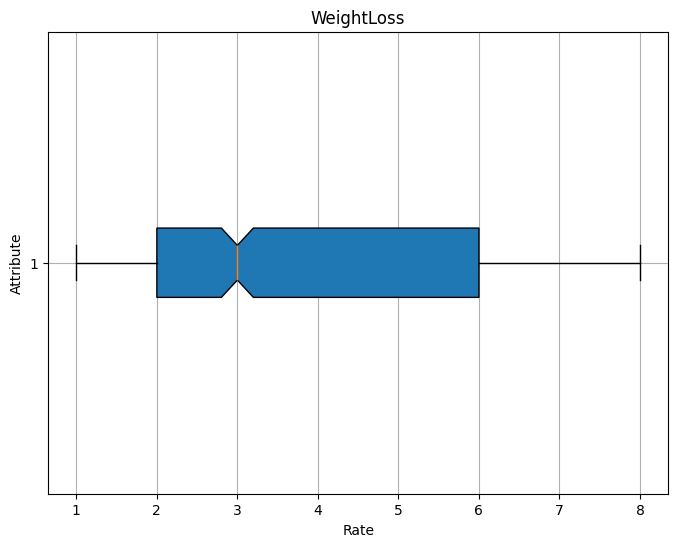

In [185]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['WeightLoss'], patch_artist=True, notch=True, vert=False)
plt.title('WeightLoss')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

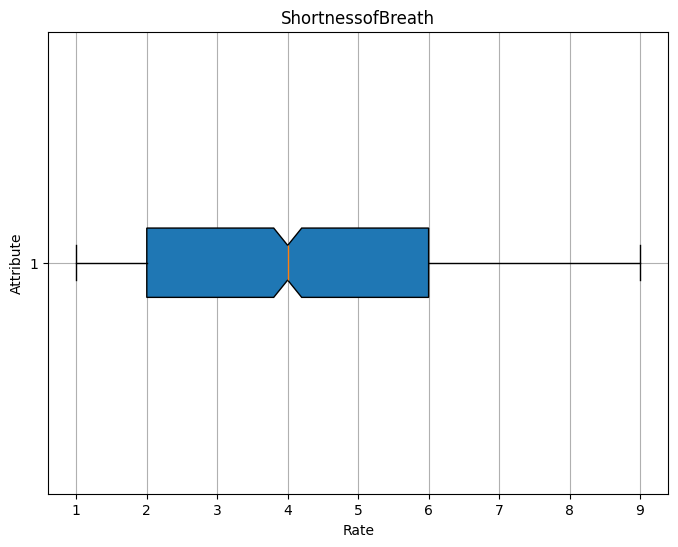

In [186]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['ShortnessofBreath'], patch_artist=True, notch=True, vert=False)
plt.title('ShortnessofBreath')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

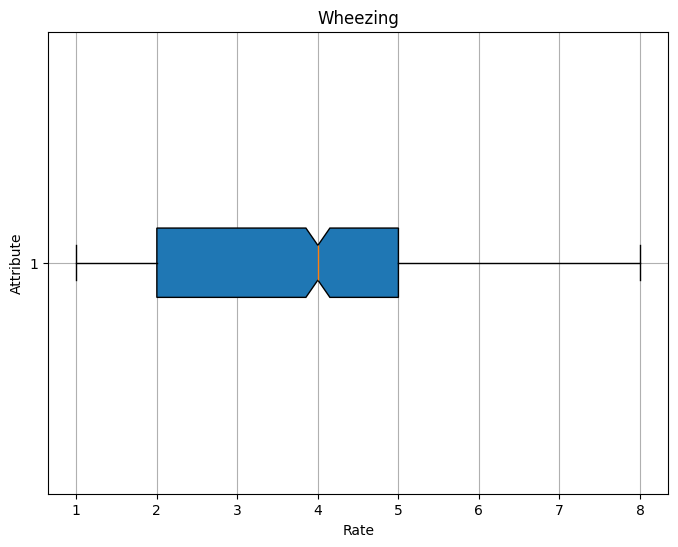

In [187]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Wheezing'], patch_artist=True, notch=True, vert=False)
plt.title('Wheezing')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

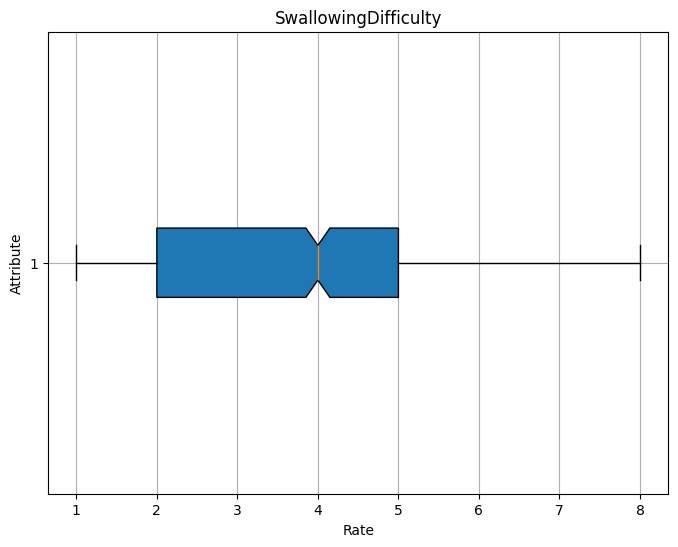

In [188]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['SwallowingDifficulty'], patch_artist=True, notch=True, vert=False)
plt.title('SwallowingDifficulty')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

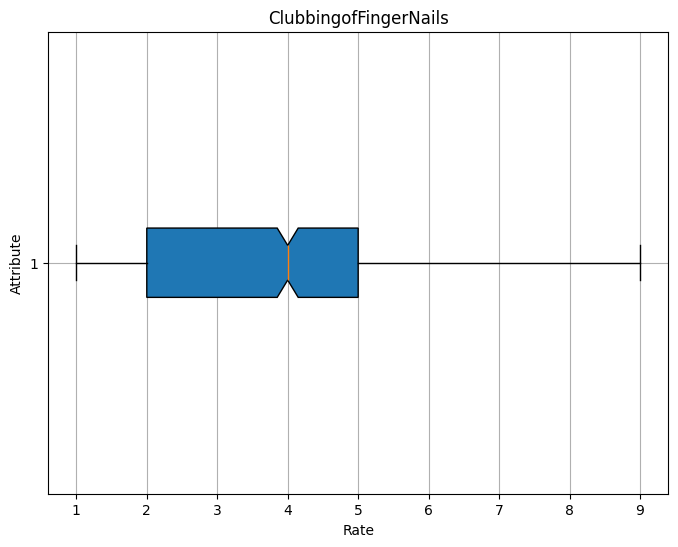

In [189]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['ClubbingofFingerNails'], patch_artist=True, notch=True, vert=False)
plt.title('ClubbingofFingerNails')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

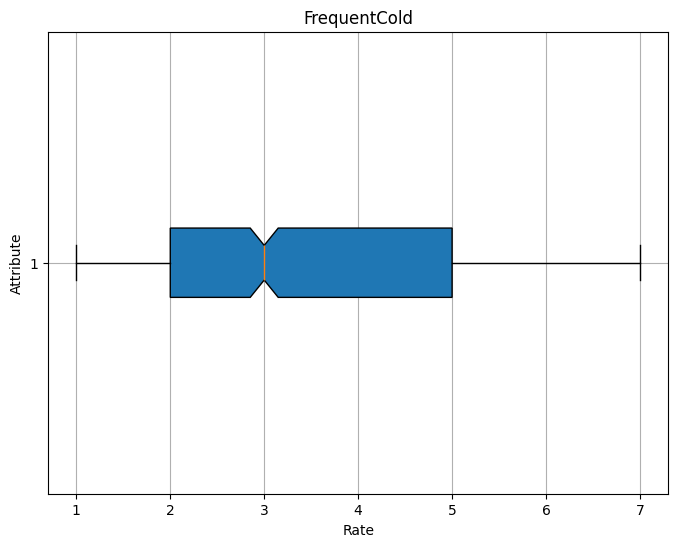

In [190]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['FrequentCold'], patch_artist=True, notch=True, vert=False)
plt.title('FrequentCold')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

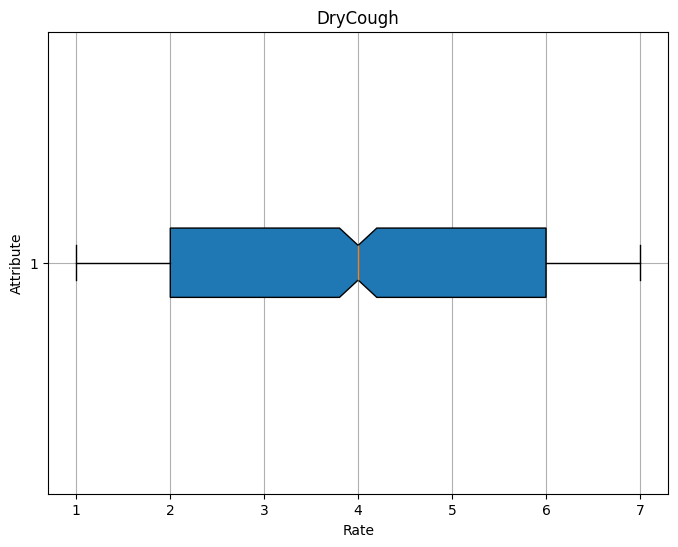

In [191]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['DryCough'], patch_artist=True, notch=True, vert=False)
plt.title('DryCough')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

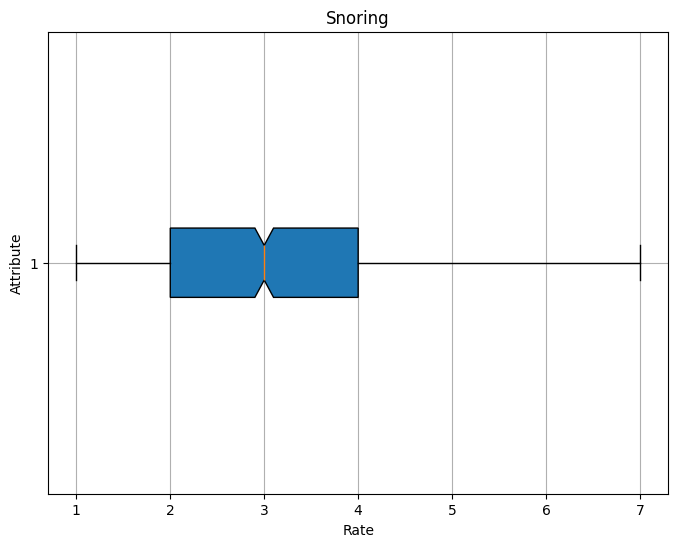

In [192]:
plt.figure(figsize=(8, 6))
plt.boxplot(dataset['Snoring'], patch_artist=True, notch=True, vert=False)
plt.title('Snoring')
plt.xlabel("Rate")
plt.ylabel("Attribute")
plt.grid(True)
plt.gca().patch.set_facecolor('white')
plt.show()

In [193]:
from collections import Counter
counts = Counter(y)
label_count_list = list(counts.values())
print(counts)
print("These are the values: ", list(counts.values()))

Counter({'High': 365, 'Medium': 332, 'Low': 303})
These are the values:  [303, 332, 365]


In [194]:
prediction_classes = ["Low","Medium", "High"]
count_of_prediction_classes = [303, 332, 365]
totalRecords = sum(count_of_prediction_classes)

# Getting the percentage of the predicted classes 
percentage_of_low_counts = (count_of_prediction_classes[0]/totalRecords) * 100
percentage_of_medium_counts = (count_of_prediction_classes[1]/totalRecords) * 100
percentage_of_high_counts = (count_of_prediction_classes[2]/totalRecords) * 100
print("Percentage of low class counts: %1d \nPercentage of medium class counts: %2d \nPercentage of high class counts: %3d" %(percentage_of_low_counts, percentage_of_medium_counts, percentage_of_high_counts))


Percentage of low class counts: 30 
Percentage of medium class counts: 33 
Percentage of high class counts:  36


In [195]:
# Getting the percentage of the predicted classes 
percentage_of_low_counts = (count_of_prediction_classes[0]/totalRecords) * 100
percentage_of_medium_counts = (count_of_prediction_classes[1]/totalRecords) * 100
percentage_of_high_counts = (count_of_prediction_classes[2]/totalRecords) * 100

In [196]:
print("Percentage of low class counts: %1d \nPercentage of medium class counts: %2d \nPercentage of high class counts: %3d" %(percentage_of_low_counts, percentage_of_medium_counts, percentage_of_high_counts))


Percentage of low class counts: 30 
Percentage of medium class counts: 33 
Percentage of high class counts:  36


In [197]:
# Current shape of the High, Medium, Low data
high = dataset[dataset['Level'] == "High"]
low = dataset[dataset['Level'] == "Low"]
medium = dataset[dataset['Level'] == "Medium"]

print("Shape of high", high.shape, "\nShape of Medium", medium.shape, "\nShape of Low", low.shape)
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek()

# Replace fit_sample with fit_resample
X_res, y_res = smote_tomek.fit_resample(X, y)

print()
print("This was the shape before Oversampling: ", X.shape)
print("This was the shape after Oversampling: ", X_res.shape) 

Shape of high (365, 25) 
Shape of Medium (332, 25) 
Shape of Low (303, 25)

This was the shape before Oversampling:  (1000, 23)
This was the shape after Oversampling:  (1095, 23)


In [198]:
from collections import Counter
counts = Counter(y_res)
label_count_list = list(counts.values())
print(counts)
print("These are the values: ", list(counts.values()))

Counter({'Low': 365, 'Medium': 365, 'High': 365})
These are the values:  [365, 365, 365]


In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split 

# dividing X_res, y_res into train and test data (Performing Train Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,test_size=0.2, random_state = 42) 

In [200]:

from sklearn.svm import SVC 

## training a SVM classifier 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 

## Prediction using SVM
svm_predictions = svm_model_linear.predict(X_test) 
print(svm_predictions)
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix, calculating accuracy, calculating score, calculating precision
cm = confusion_matrix(y_test, svm_predictions) 
ac = accuracy_score(y_test, svm_predictions)
rs = recall_score(y_test, svm_predictions, average=None)
ps = precision_score(y_test, svm_predictions, average=None)

print("Confusion matrix: " + str(cm))
print("Accuracy score: " + str(ac*100))
print("Recall score: " + str(rs))
print("Precision score: " + str(ps))

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

"Sensitivity: {} | Specifictity: {}".format(sensitivity, specificity)

['High' 'High' 'High' 'Medium' 'High' 'Low' 'Medium' 'Low' 'Medium' 'Low'
 'Low' 'Low' 'High' 'Low' 'Medium' 'Medium' 'High' 'Medium' 'High' 'High'
 'Low' 'High' 'Low' 'Medium' 'High' 'Low' 'High' 'Low' 'High' 'Medium'
 'High' 'Low' 'Medium' 'Low' 'Medium' 'Low' 'High' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'High' 'High' 'Medium' 'High' 'Low' 'High' 'High' 'Medium'
 'Low' 'Low' 'High' 'Medium' 'Medium' 'Medium' 'Medium' 'Low' 'Medium'
 'Low' 'High' 'Low' 'Medium' 'Medium' 'High' 'Medium' 'Low' 'High'
 'Medium' 'High' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Medium' 'Medium'
 'Low' 'Medium' 'Low' 'Low' 'Low' 'High' 'Medium' 'Medium' 'High' 'Low'
 'Medium' 'Medium' 'High' 'Low' 'Medium' 'High' 'High' 'Medium' 'High'
 'Low' 'High' 'High' 'High' 'High' 'Low' 'Medium' 'Low' 'Low' 'Low' 'High'
 'Medium' 'Medium' 'Medium' 'High' 'Medium' 'High' 'High' 'Medium' 'Low'
 'High' 'Low' 'Low' 'Medium' 'High' 'High' 'Medium' 'Low' 'High' 'High'
 'High' 'Low' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'Medium

'Sensitivity: 1.0 | Specifictity: 1.0'

In [201]:
input_data = (33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm_model_linear.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=="Low"):
    print('The Person have low symptoms ')
elif(prediction[1]=="Medium"):
    print('The Person has medium symptoms')
else:
    print('Thw person has high symptoms')

['Low']
The Person have low symptoms 


C:\Users\Manaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [202]:
import pickle

In [203]:
filename = 'Lung-disease-model.sav'
pickle.dump(svm_model_linear, open(filename, 'wb'))

In [204]:
loaded_model = pickle.load(open('Lung-disease-model.sav', 'rb'))

In [205]:
for column in X.columns:
  print(column)

Age
Gender
AirPollution
Alcoholuse
DustAllergy
OccuPationalHazards
GeneticRisk
chronicLungDisease
BalancedDiet
Obesity
Smoking
PassiveSmoker
ChestPain
CoughingofBlood
Fatigue
WeightLoss
ShortnessofBreath
Wheezing
SwallowingDifficulty
ClubbingofFingerNails
FrequentCold
DryCough
Snoring


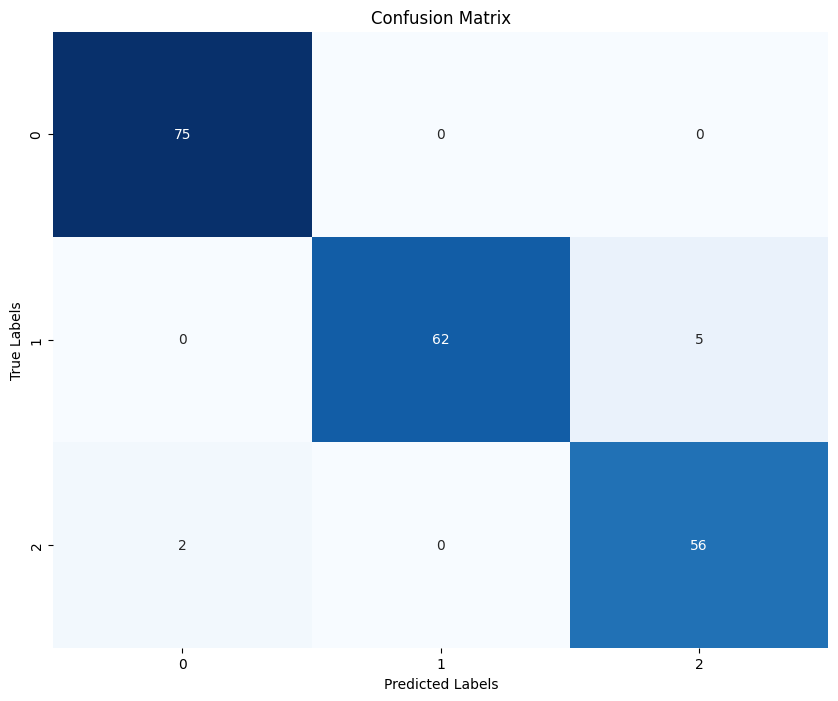

In [209]:
attributes = [
    'Age', 'Gender', 'AirPollution', 'Alcoholuse', 'DustAllergy', 
    'OccuPationalHazards', 'GeneticRisk', 'chronicLungDisease', 
    'BalancedDiet', 'Obesity', 'Smoking', 'PassiveSmoker', 
    'ChestPain', 'CoughingofBlood', 'Fatigue', 'WeightLoss', 
    'ShortnessofBreath', 'Wheezing', 'SwallowingDifficulty', 
    'ClubbingofFingerNails', 'FrequentCold', 'DryCough', 'Snoring'
]


X = dataset[attributes]
y = dataset['Level']

# Split the data into train and test sets (you can use your preferred method)
# For example, using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

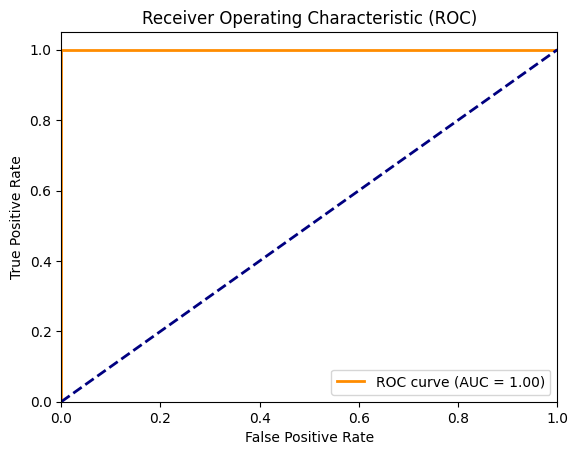

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_binary = (y == 'High').astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=0)

# Train the SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# Predict probabilities
y_prob = svm_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()